# Imports

In [1]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images/255
test_images = test_images/255

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**See some examples**

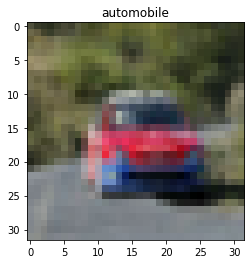

In [8]:
index = 6969

plt.figure()
plt.imshow(train_images[index])
plt.title(labels[int(train_labels[index])])
plt.show()

# Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',
                              input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [17]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=64, epochs=5
                    )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 59s 75ms/step - loss: 1.5826 - accuracy: 0.4265 - val_loss: 1.3187 - val_accuracy: 0.5332
Epoch 2/5
782/782 [==============================] - 56s 72ms/step - loss: 1.2314 - accuracy: 0.5642 - val_loss: 1.1459 - val_accuracy: 0.6015
Epoch 3/5
782/782 [==============================] - 65s 84ms/step - loss: 1.0956 - accuracy: 0.6161 - val_loss: 1.0914 - val_accuracy: 0.6152
Epoch 4/5
782/782 [==============================] - 57s 73ms/step - loss: 1.0043 - accuracy: 0.6488 - val_loss: 0.9891 - val_accuracy: 0.6573
Epoch 5/5
782/782 [==============================] - 57s 73ms/step - loss: 0.9421 - accuracy: 0.6717 - val_loss: 0.9696 - val_accuracy: 0.6596


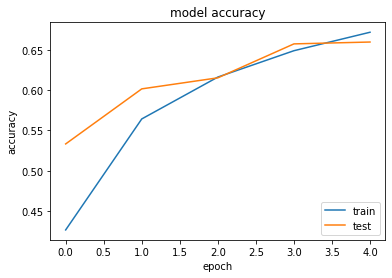

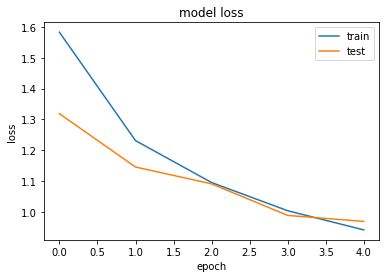

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluation and Prediction

In [22]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.9696 - accuracy: 0.6596 - 3s/epoch - 9ms/step


[0.9696438312530518, 0.659600019454956]

In [23]:
predictions = model.predict(test_images)

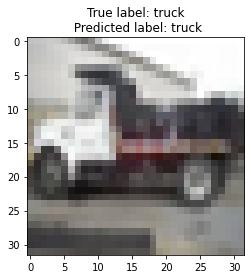

In [27]:
index = 969

plt.figure()
plt.imshow(test_images[index])
plt.title(f"True label: {labels[int(test_labels[index])]}\n Predicted label: {labels[np.argmax(predictions[index])]}")
plt.show()